# Creating a realistic recording site from a rat cortex column - Blue Brain

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
np.set_printoptions(suppress=True)

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

from collections import namedtuple
Channel = namedtuple("Channel", ["id", "pos", "type"])
Neuron = namedtuple("Neuron", ["id", "pos", "btype", "mtype", "layer"])
Layer = namedtuple("Layer", ["id", "name", "height", "volume", "total_count", "total_density", "in_ratio", 
                             "layer_density_distributions"])

## 1.  Building and visualizing a rat Somatosensory cortex column object

In [2]:
from ERSS.regions.cortex.CortexColumn import Column
from ERSS.regions.cortex.rat_data.CortexDataDicts import createBlueBrainRatSomatosensoryCortexDataDict

#Random seed for reproducibility
np.random.seed(2)

#Import rat somatosensory cortex column dict from the Blue Brain neocortical reconstruction data
rat_somatosensory_cortex_data_dict = createBlueBrainRatSomatosensoryCortexDataDict()
'''
Create new column using the given cortex dict, a user defined radius, and a 
min distance (microns) enforced between neurons (takes a couple of minutes due to min_dist being set to 15)
'''
column = Column(rat_somatosensory_cortex_data_dict, radius=210.0, min_neuron_dist=10)

Building density/depth distributions...
... distributions built!
Building layers...
... layers built!
Filling layers with neurons...
...Filling layer L1 with 324 neurons...
...Filling layer L2 with 4108 neurons...
...Filling layer L3 with 4028 neurons...
...Filling layer L4 with 4201 neurons...
...Filling layer L5 with 5507 neurons...
...Filling layer L6 with 10687 neurons...
... all layers filled!


In [3]:
print('Mean' in rat_somatosensory_cortex_data_dict.keys())

True


In [4]:
rat_somatosensory_cortex_data_dict['Mean']

{'densities': [14.2, 164.6, 83.8, 177.3, 83.9, 131.5],
 'heights': [165.0, 149.0, 353.0, 190.0, 525.0, 700.0],
 'in_ratios': [100.0, 15.9, 15.9, 10.3, 17.4, 10.8],
 'layers': ['L1', 'L2', 'L3', 'L4', 'L5', 'L6']}

In [5]:
#Layer information is stored in a layer DataFrame

print(column.getLayers())

   id region      height  radius    volume  neuron_count     density  \
0   0     L1  141.685337   210.0  0.019630           324   16.516107   
1   1     L2  170.323521   210.0  0.023597          4108  174.104459   
2   2     L3  323.093255   210.0  0.044763          4028   89.988962   
3   3     L4  184.107768   210.0  0.025507          4201  164.710369   
4   4     L5  523.143195   210.0  0.072478          5507   75.991634   
5   5     L6  679.995623   210.0  0.094209         10687  113.443323   

   in_ratio                        layer_density_distributions  
0     100.0  <scipy.stats._distn_infrastructure.rv_sample o...  
1      15.9  <scipy.stats._distn_infrastructure.rv_sample o...  
2      15.9  <scipy.stats._distn_infrastructure.rv_sample o...  
3      10.3  <scipy.stats._distn_infrastructure.rv_sample o...  
4      17.4  <scipy.stats._distn_infrastructure.rv_sample o...  
5      10.8  <scipy.stats._distn_infrastructure.rv_sample o...  


In [16]:
#Neuron information is stored in a neuron DataFrame
print(column.getNeurons())

          id                                                pos btype   mtype  \
0          0  [49.37471656932656, 100.9180288747179, 4.29955...    IN  L1_HAC   
1          1  [122.07341564373789, 116.90959716346411, 66.89...    IN  L1_HAC   
2          2  [-199.55106320835654, -11.90038440462965, 122....    IN  L1_HAC   
3          3  [90.50058427783566, 83.86685413576977, 119.787...    IN  L1_HAC   
4          4  [-34.153011008936886, -206.7414984568085, 126....    IN  L1_HAC   
5          5  [82.4137510056129, 74.61772668642891, 128.6866...    IN  L1_HAC   
6          6  [-94.48008317379573, -91.19594518597992, 91.79...    IN  L1_HAC   
7          7  [78.04859148025449, 60.874777316440706, 140.08...    IN  L1_HAC   
8          8  [88.47043854289372, -9.899660964163497, 34.796...    IN  L1_HAC   
9          9  [88.53229579391197, -120.36557165536952, 134.4...    IN  L1_HAC   
10        10  [-18.945283896186442, 49.09985780382073, 80.79...    IN  L1_HAC   
11        11  [-159.67731858

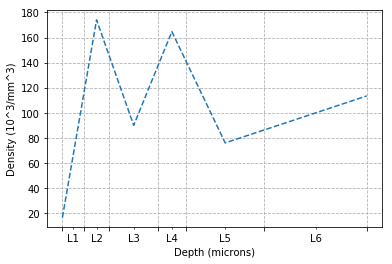

In [7]:
#Plot the density vs. depth distribution from which neurons were sampled

column.plotDensityDistribution()

Layer: L2
Radius: 210.0
Height: 170.32352050926485
Total Neurons: 4108
IN Neurons: 653
EX Neurons: 3455


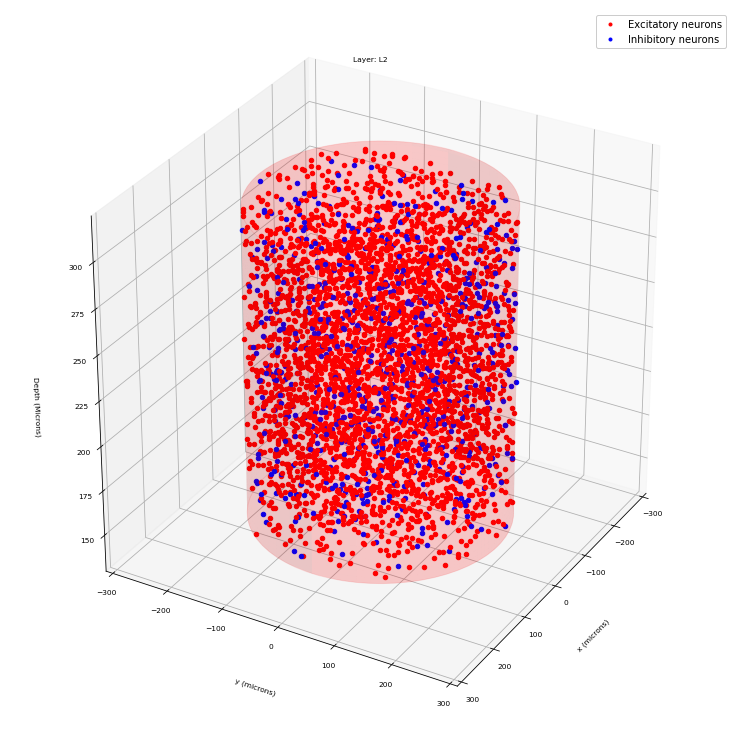

In [8]:
#Plot a layer from the cortex column
layer_id = 1
fig= plt.figure(figsize=(10,10))
ax = Axes3D(fig, azim=30, elev=30)

column.plotLayer(layer_id, ax=ax)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5', 'L6']
Radii: [210.0, 210.0, 210.0, 210.0, 210.0, 210.0]
Heights: [141.68533739246678, 170.32352050926485, 323.09325466064166, 184.10776844040657, 523.1431947015311, 679.9956233245374]


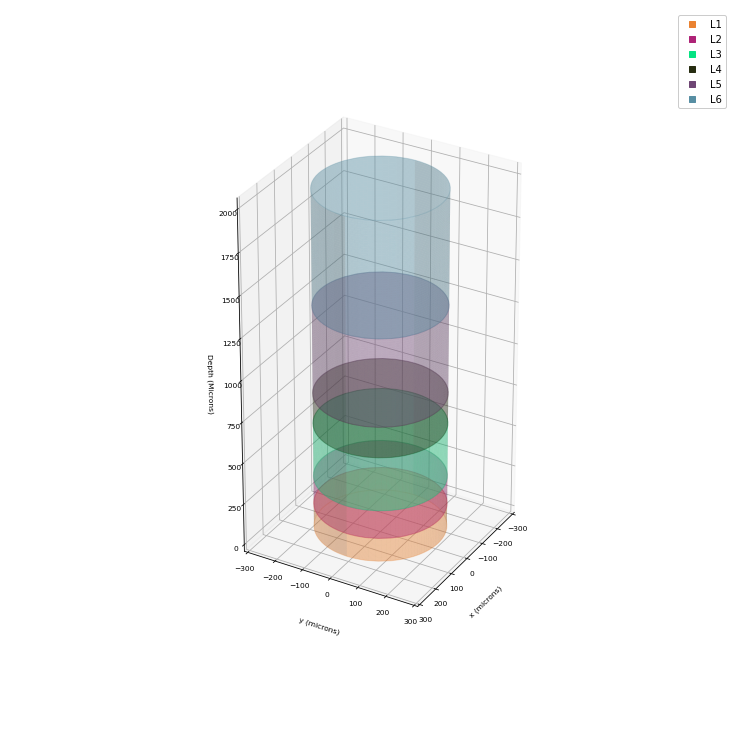

In [9]:
#Plot the entire column without any neurons to see the layer shapes
fig=plt.figure(figsize=(10,10))
ax = Axes3D(fig, azim=30, elev=30)

column.plotColumn(plot_neurons=False, ax=ax)

In [10]:
print(column.depths)

[0, 141.68533739246678, 312.00885790173163, 635.1021125623733, 819.2098810027799, 1342.3530757043109, 2022.3486990288484]


Layers: ['L1', 'L2', 'L3', 'L4', 'L5', 'L6']
Radii: [210.0, 210.0, 210.0, 210.0, 210.0, 210.0]
Heights: [141.68533739246678, 170.32352050926485, 323.09325466064166, 184.10776844040657, 523.1431947015311, 679.9956233245374]
Total Neurons: {'L6': 10687, 'L4': 4201, 'L5': 5507, 'L2': 4108, 'L3': 4028, 'L1': 324}
IN Neurons: {'L6': 1154, 'L4': 433, 'L5': 958, 'L2': 653, 'L3': 640, 'L1': 324}
EX Neurons: {'L6': 9533, 'L4': 3768, 'L5': 4549, 'L2': 3455, 'L3': 3388, 'L1': 0}


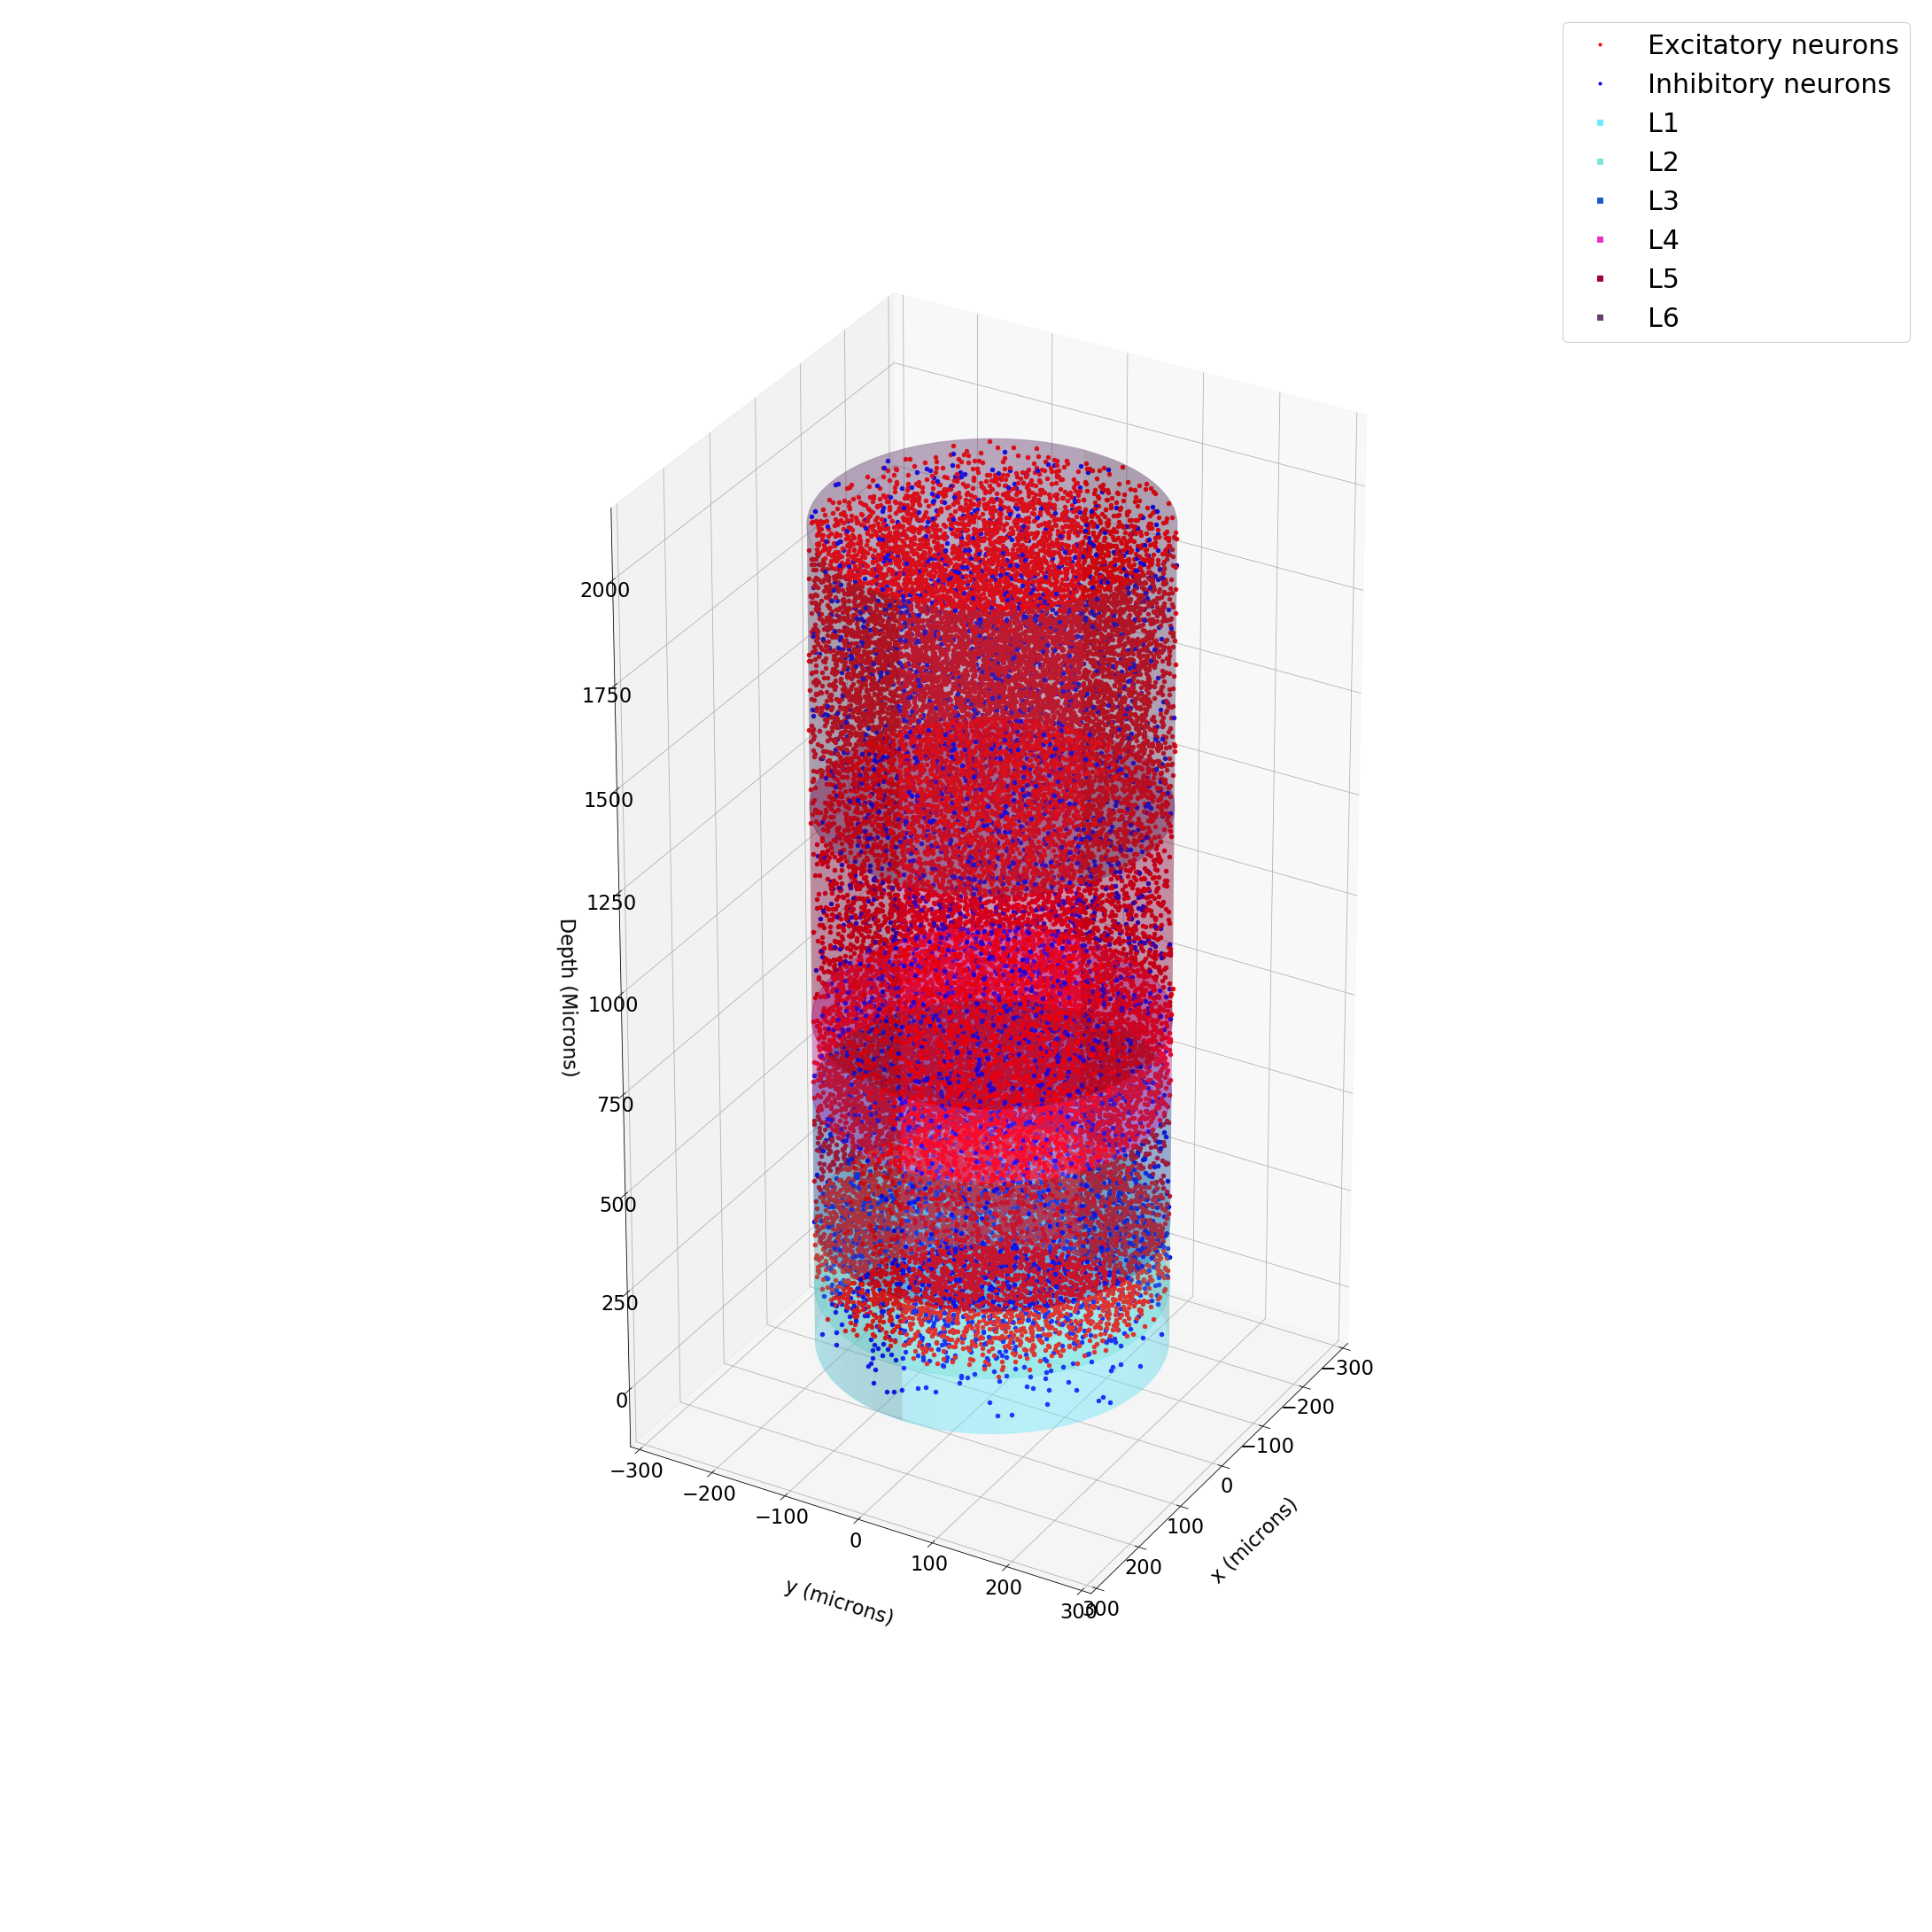

In [11]:
#Can plot the entire column with all neurons included (pretty slow, lots of neurons to be scattered)
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

column.plotColumn(plot_neurons=True, ax=ax)

## 2. Creating and using a Probe object (Neuropixels subclass)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5', 'L6']
Radii: [210.0, 210.0, 210.0, 210.0, 210.0, 210.0]
Heights: [141.68533739246678, 170.32352050926485, 323.09325466064166, 184.10776844040657, 523.1431947015311, 679.9956233245374]


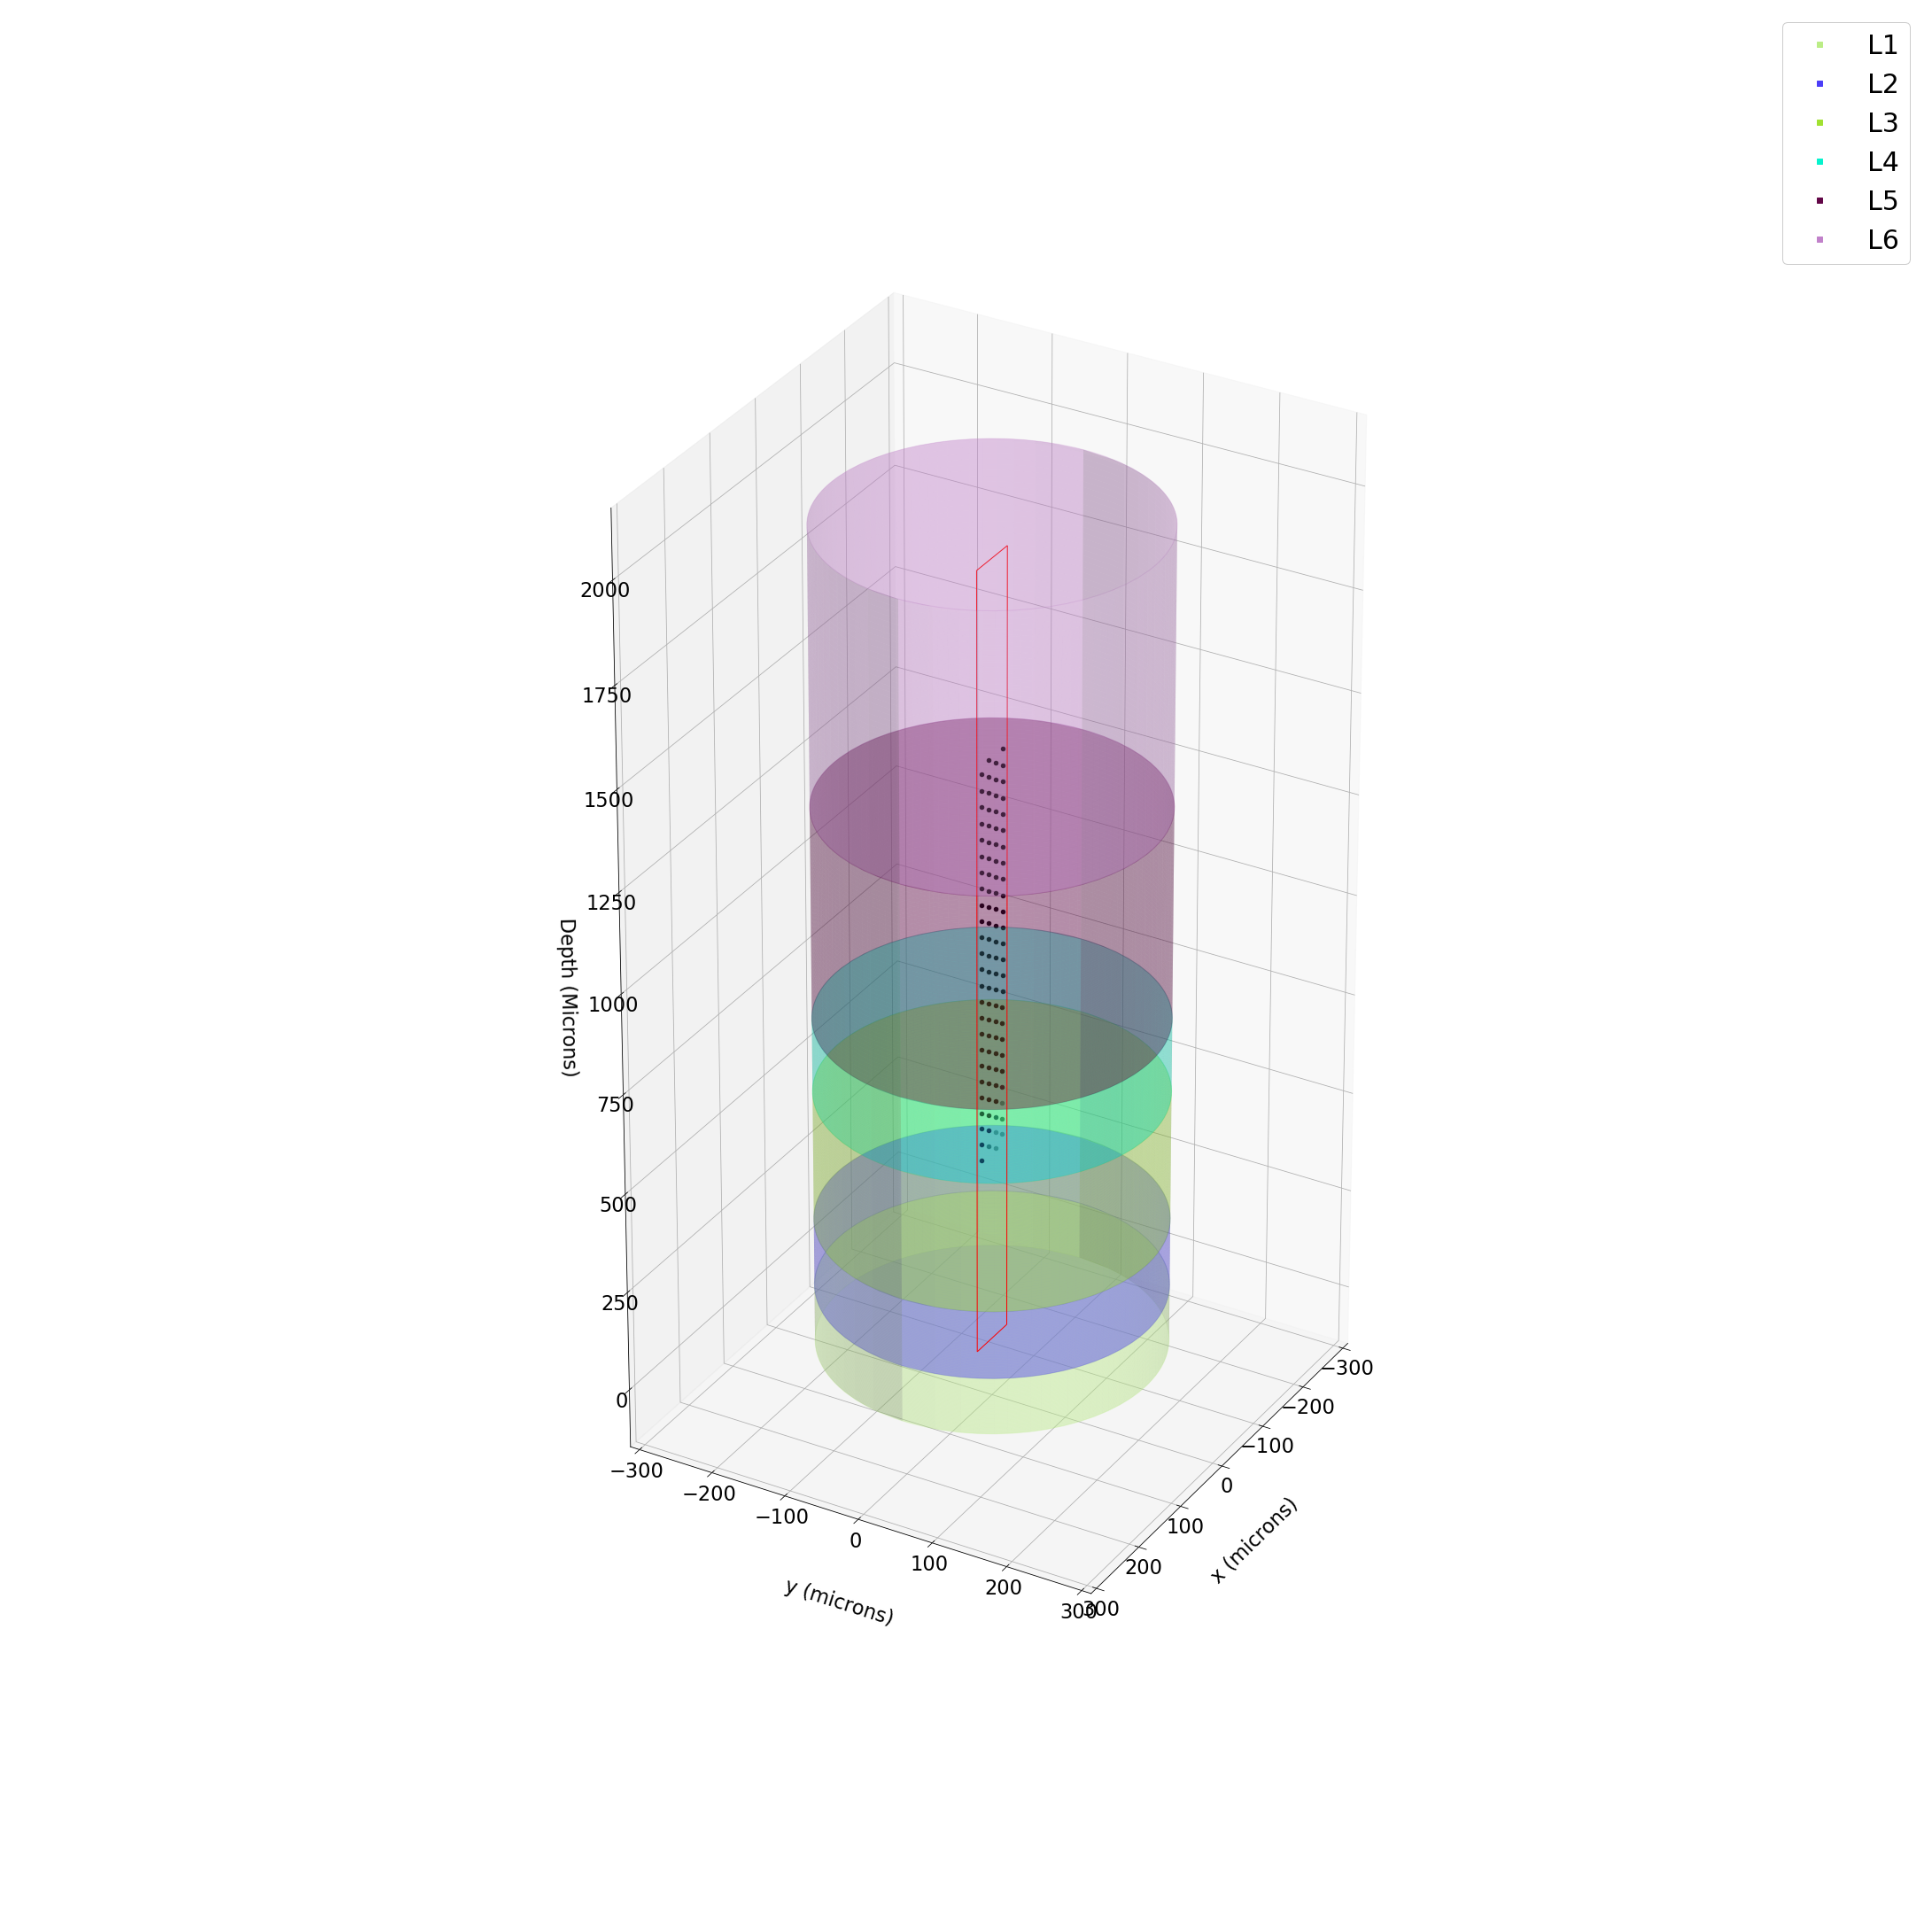

In [12]:
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

#Import a probe object that is instantiated with a specified number of channels
from ERSS.probes.PremadeProbes import NeuropixelsProbe
probe = NeuropixelsProbe(num_channels = 192)

#Draw the probe, black channels are recording, orange channels are reference (can exclude channel ids from drawing)
excluded_channel_ids = range(46) + range(146, 192)
probe.draw(ax=ax, excluded_channel_ids=excluded_channel_ids)

#Plot the layers of the column to see how the probe interacts with the cortical region
column.plotColumn(plot_neurons=False, ax=ax)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5', 'L6']
Radii: [210.0, 210.0, 210.0, 210.0, 210.0, 210.0]
Heights: [141.68533739246678, 170.32352050926485, 323.09325466064166, 184.10776844040657, 523.1431947015311, 679.9956233245374]


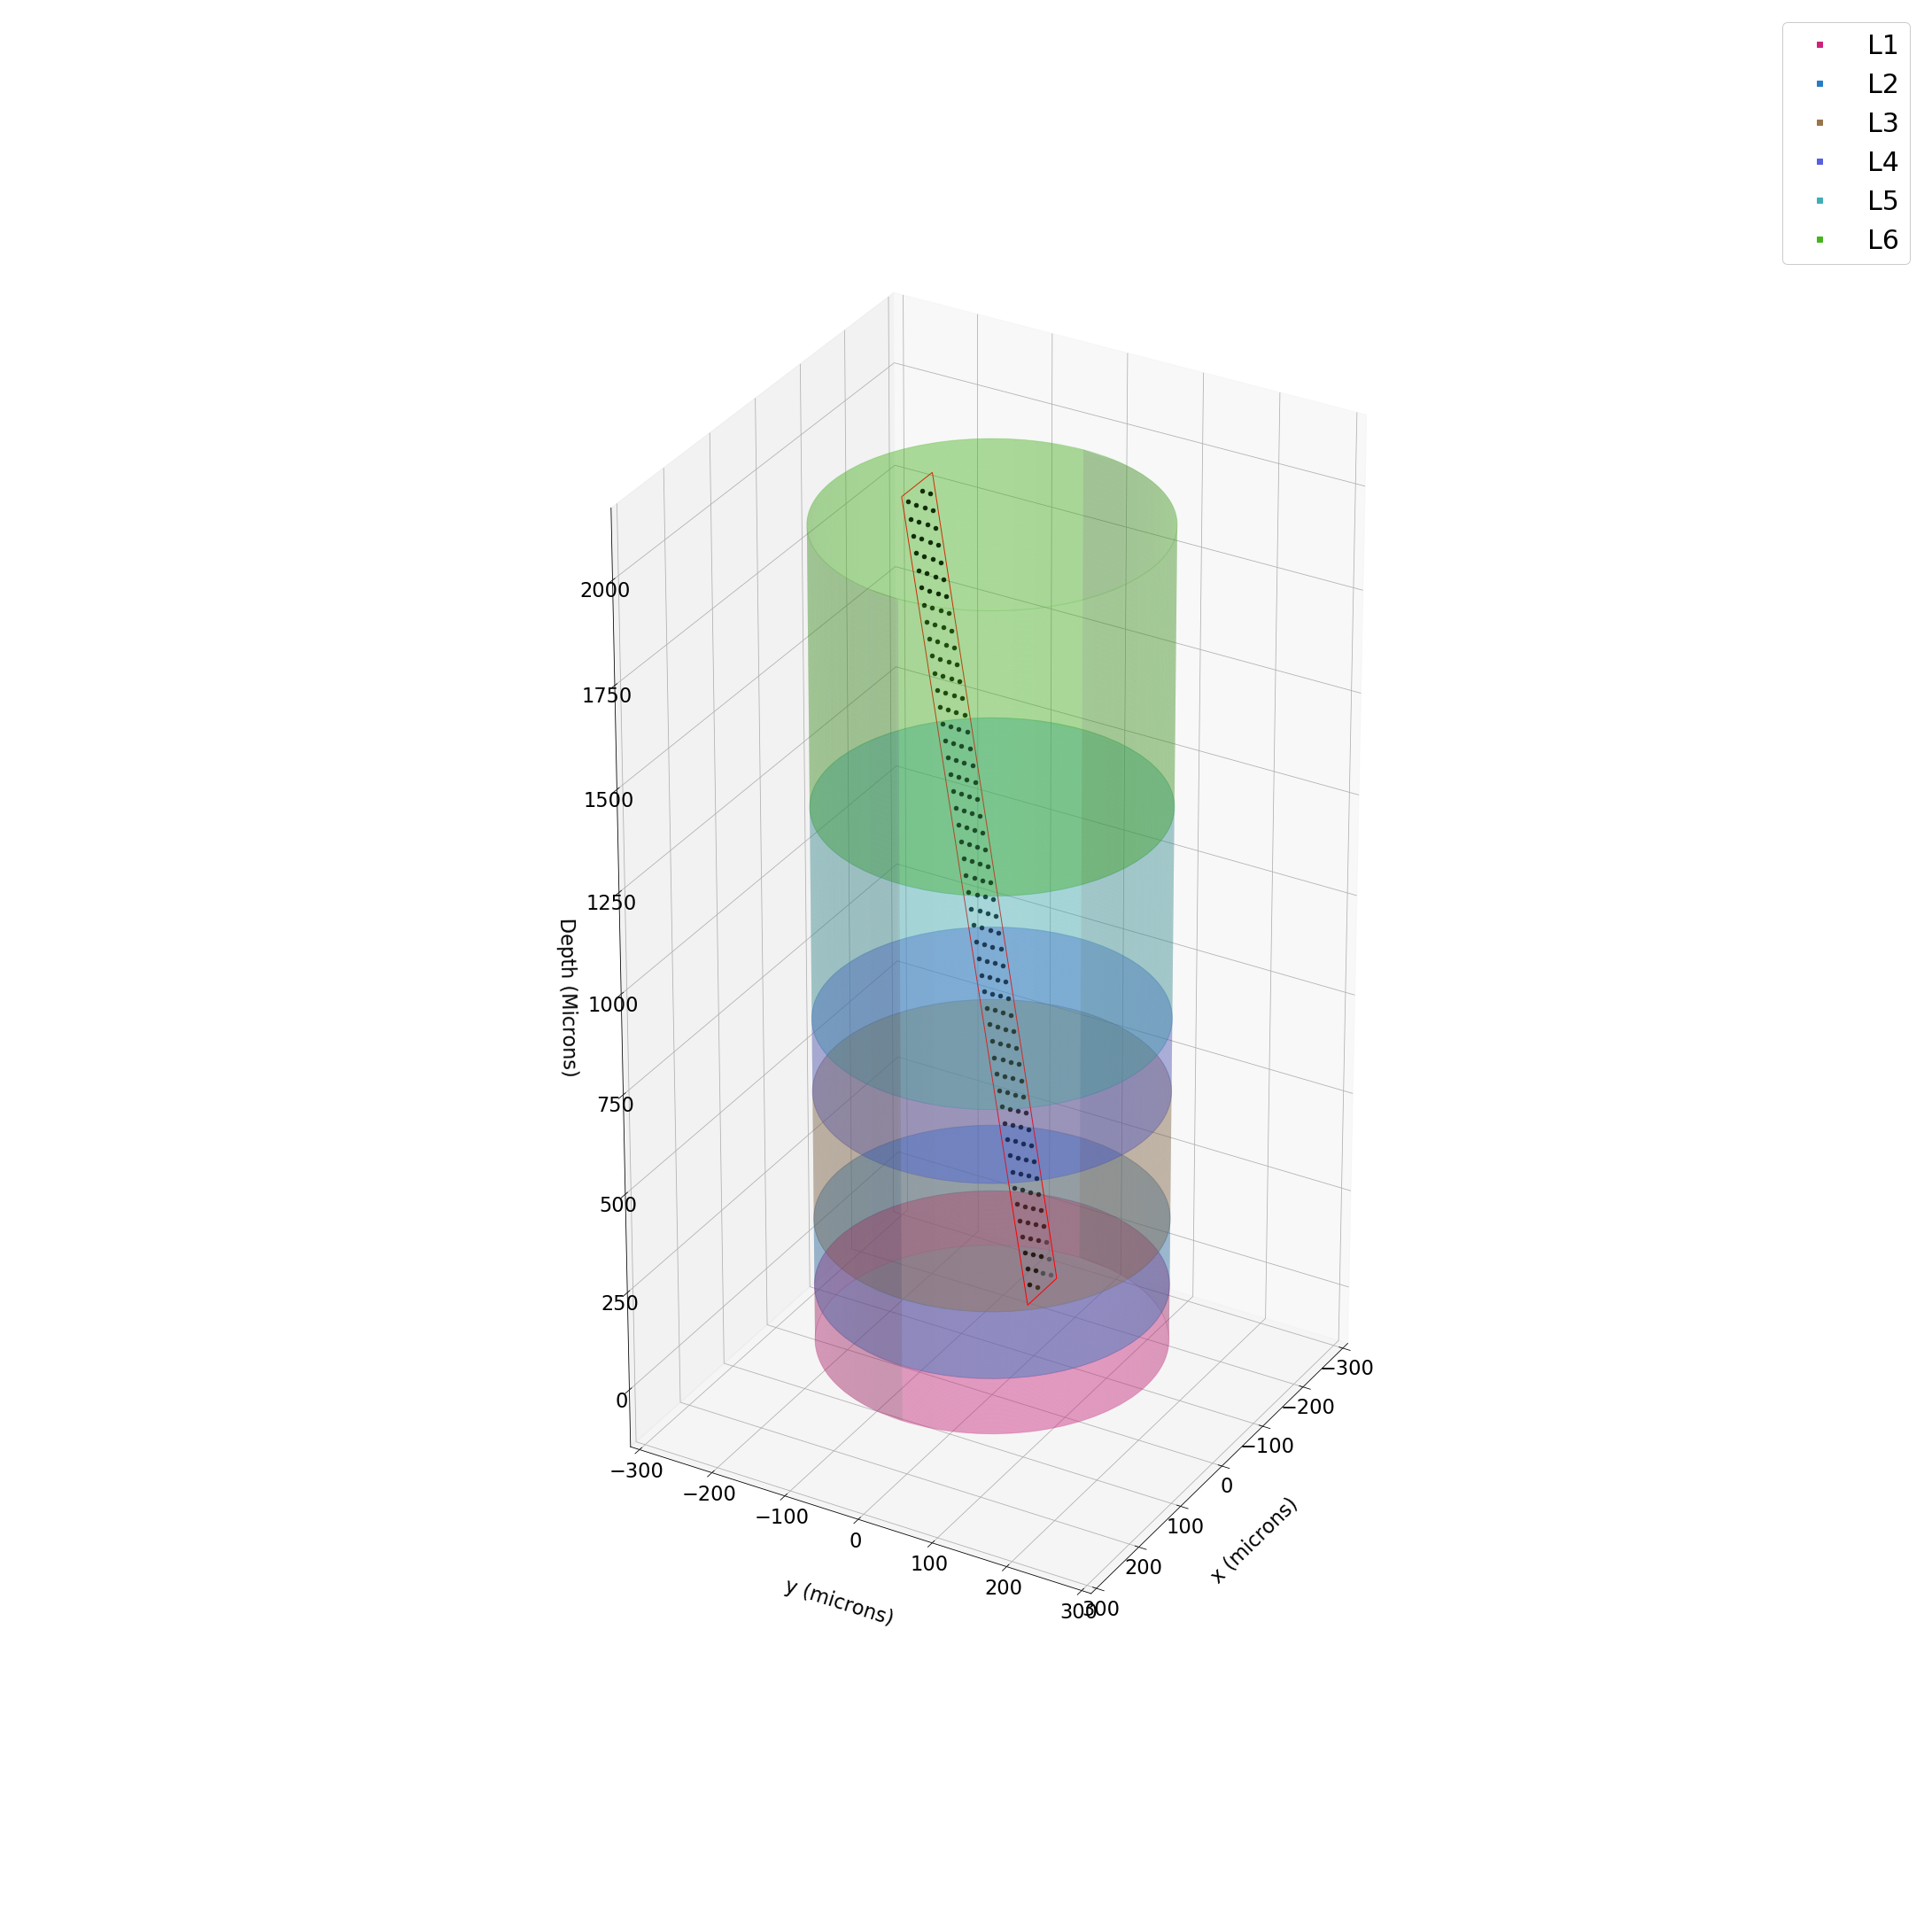

In [13]:
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

#rotate the probe around the given axis counterclockwise with a given angle (radians). Plotting is optional
axis = np.asarray([1, 0, 0])
theta = math.pi/36 #radians
probe.rotate(theta, axis, ax=ax, plot=False)

#shift the probe in the direction of a given axis with a given distance. Plotting is optional
axis = np.asarray([1, 0, 0])
dist = -120 #microns
probe.shift(dist, axis, ax=ax, plot=True)


column.plotColumn(plot_neurons=False, ax=ax)

Num neurons: 2384
Layers: ['L1', 'L2', 'L3', 'L4', 'L5', 'L6']
Radii: [210.0, 210.0, 210.0, 210.0, 210.0, 210.0]
Heights: [141.68533739246678, 170.32352050926485, 323.09325466064166, 184.10776844040657, 523.1431947015311, 679.9956233245374]
Total Neurons: {'L6': 305, 'L4': 711, 'L5': 889, 'L2': 0, 'L3': 479, 'L1': 0}
IN Neurons: {'L6': 27, 'L4': 75, 'L5': 158, 'L2': 0, 'L3': 74, 'L1': 0}
EX Neurons: {'L6': 278, 'L4': 636, 'L5': 731, 'L2': 0, 'L3': 405, 'L1': 0}


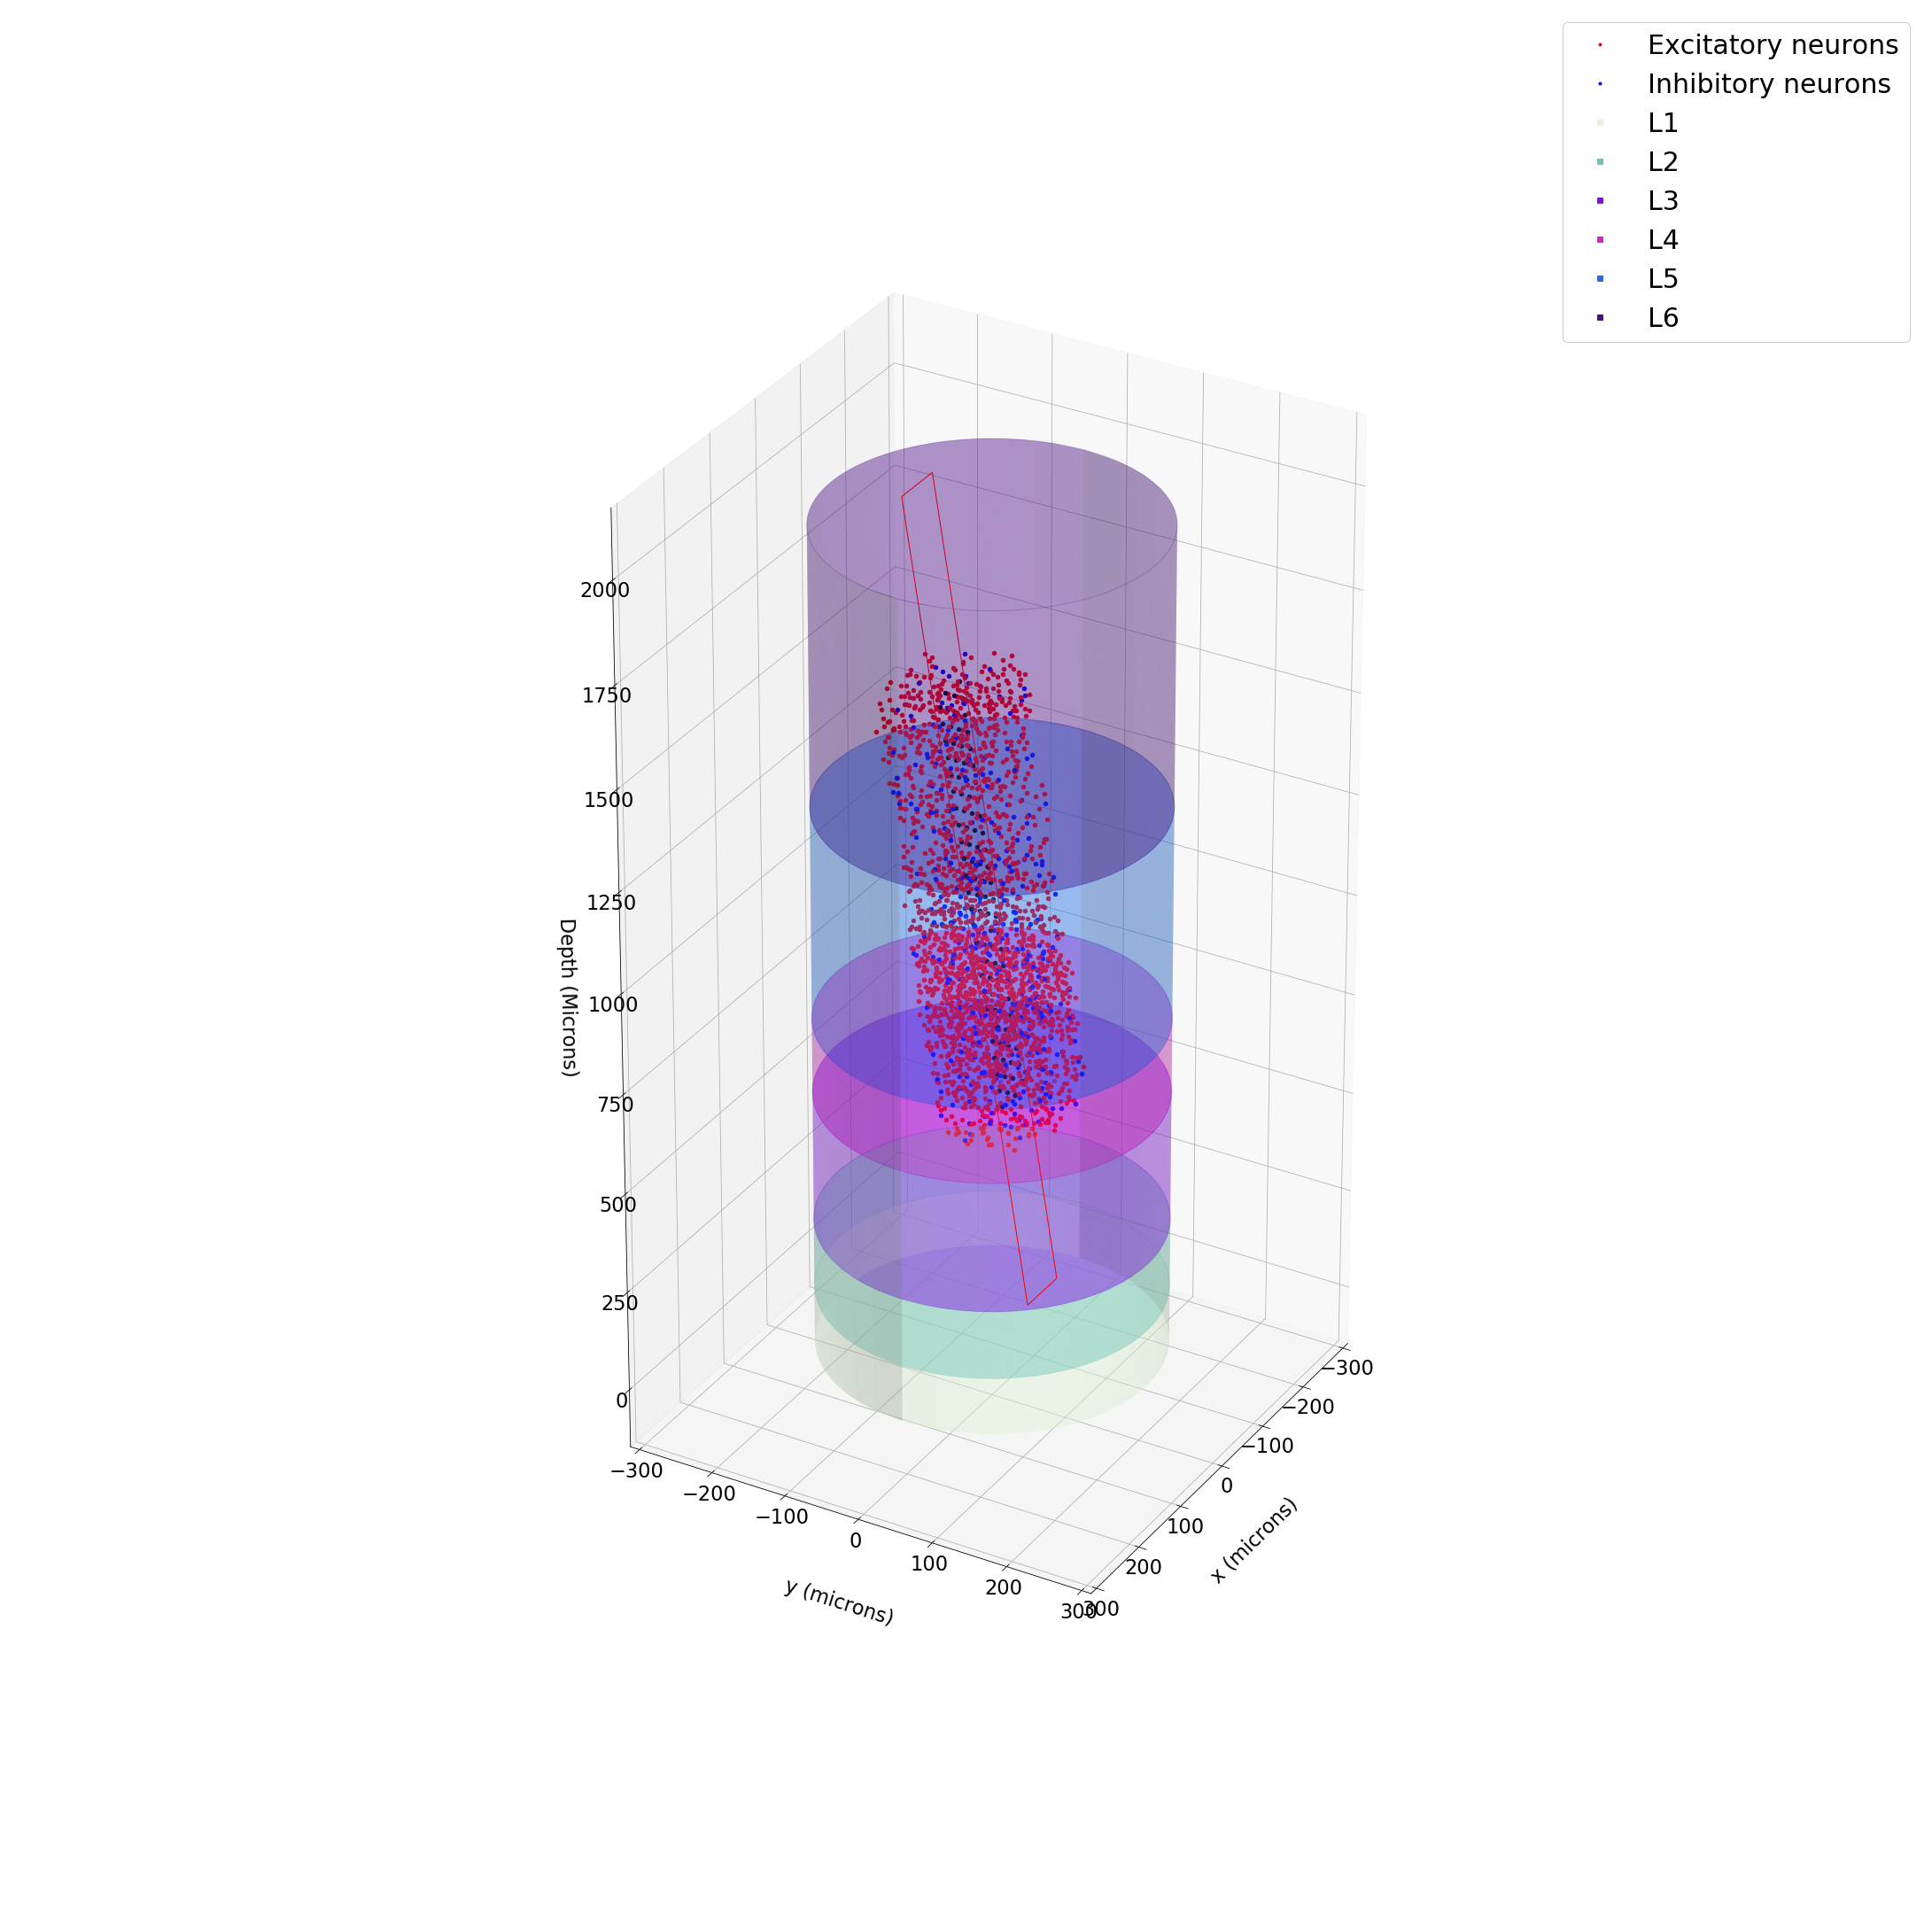

In [14]:
#Get all neurons within a radius of any channel on the array (can exclude channels)
close_neuron_df = probe.getNeuronsRadius(column.getNeurons(), radius=80.0, excluded_channel_ids=excluded_channel_ids)
print("Num neurons: " + str(close_neuron_df.shape[0]))
#Can plot the column with all neurons in the radius
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)
probe.draw(ax, excluded_channel_ids=excluded_channel_ids)

column.plotColumn(close_neuron_df, plot_neurons=True, ax=ax)

## 3. All data structures needed for simulating an extracellular recording

In [15]:
#All neurons for the recording
print(close_neuron_df)

#Can get all neuron positions in numpy array
close_neuron_pos = np.asarray(list(close_neuron_df['pos'].copy()))
print(close_neuron_pos.shape)


#All channels on the probe (you can return all non-excluded channel ids)
probe_channels = probe.getChannels(excluded_channel_ids=excluded_channel_ids)
print(probe_channels)

#Can get all channel positions in numpy array
close_channels_pos = np.asarray(list(probe_channels['pos'].copy()))
print(close_channels_pos.shape)

          id                                                pos btype  \
16384  16384  [-151.83162597153057, -50.06537892524363, 917....    EX   
16387  16387  [-149.92534397456848, -121.24993649446435, 105...    EX   
8199    8199  [-96.39636764175127, -105.12042843252785, 480....    EX   
8202    8202  [-97.8375002583993, -5.580379852996456, 611.49...    EX   
8203    8203  [-192.13223562807397, -14.912875504550081, 584...    EX   
16396  16396  [-42.976018450707734, -40.678014339624255, 977...    EX   
8209    8209  [-90.84629364598102, -30.10899185627665, 422.9...    EX   
16403  16403  [-85.30419724736466, -134.47449967778078, 873....    EX   
8213    8213  [-117.43110406312493, -22.934950039812726, 432...    EX   
16408  16408  [-37.11966982860749, -144.58996694460157, 1204...    EX   
8217    8217  [-60.89521888008152, -4.280582082036685, 585.0...    EX   
16413  16413  [-44.27741435377202, -70.71649464369295, 862.8...    EX   
8222    8222  [-154.503552661328, -63.5986229824946